In [9]:
import pandas as pd
import os
import json
import sys
from os.path import expanduser
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pysd2cat.data import pipeline
from pysd2cat.analysis import correctness 

from data_converge.util import data_utils as du

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from agavepy.agave import Agave, AgaveError
ag = Agave.restore()



DATA_CONVERGE_PROJECT="sd2e-project-43"

data_converge_base = os.path.join(expanduser("~"), 'sd2e-projects', DATA_CONVERGE_PROJECT)
experiment_dir = os.path.realpath(os.path.join(data_converge_base, 'test'))
experiment_dir_contents = [os.path.realpath(os.path.join(experiment_dir, x)) for x in os.listdir(experiment_dir)]

experiments = [x for x in  experiment_dir_contents 
               if os.path.isdir(x) and "dc_" in x]
experiments.sort()

DATA_CONVERGE_CORRECTNESS_DATA_PROJECT="sd2e-project-45"
DATA_CONVERGE_CORRECTNESS_DATA_PROJECT_ID="data-sd2e-projects.sd2e-project-45"


data_converge_correctness_data_base = os.path.join(expanduser("~"), 'sd2e-projects', DATA_CONVERGE_CORRECTNESS_DATA_PROJECT)

correctness_dir = os.path.join(data_converge_correctness_data_base, 'correctness')
correctness_dir_contents = [os.path.realpath(os.path.join(correctness_dir, x)) for x in os.listdir(correctness_dir)]

experiments

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_CEN-PK-Inducible-CRISPR-Characterization_20200426200027',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200414091814',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Growth-Curves_20200327174254',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Growth-Curves_20200414150010',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Growth-Curves_20200423201016',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-CRISPR-Dose-Response_20200327165322',
 '/work/projects/SD2E-Commu

In [10]:
approved_experiments = [
    '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308',
    '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-CRISPR-Dose-Response_20200423194728',
    '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-CRISPR-Long-Duration-Time-Series-20191208_20200423193808',   
    '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-35C_20200423195648',
    '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-20191208_20200423194115',
    '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-Doxycycline-OR-Gate-Plant-TF-Dose-Response_20200426192144',
    '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-OR-Gate-CRISPR-Dose-Response_20200427004659',
    '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_CEN-PK-Inducible-CRISPR-Characterization_20200426200027'
]

In [15]:
accuracy_df = pd.DataFrame()
for experiment_path in approved_experiments:
    experiment_name = experiment_path.split("/")[-1]
    print(experiment_name)
    #print(experiment_path)
    data_file = experiment_name + ".csv"
    data_files = [x['name'] for x in ag.files.list(filePath="correctness", systemId=DATA_CONVERGE_CORRECTNESS_DATA_PROJECT_ID)]
    if data_file in data_files:
        print("Getting correctness")
        data_file_path = os.path.join(data_converge_correctness_data_base, 'correctness', data_file)
        res = pd.read_csv(data_file_path, index_col=0)
        df = du.get_meta(experiment_path, 
                   du.get_record(experiment_path)).merge(res, on="sample_id", how="inner")
        

        df.loc[:,'experiment_id'] = experiment_name
        accuracy_df = accuracy_df.append(df, ignore_index=True)
    else:
        print("correctness not present")
accuracy_df.loc[:,'correctness'] = accuracy_df.apply(lambda x: np.maximum(x.mean_correct_high_classifier, x.mean_correct_low_classifier), axis=1)
accuracy_df = accuracy_df[['experiment_id', 'inducer_concentration', 'strain_name', 'timepoint', 'replicate', 'correctness', 'mean_correct_low_classifier', 'mean_correct_high_classifier']]
accuracy_df

dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
Getting correctness
dc_YeastSTATES-CRISPR-Dose-Response_20200423194728
Getting correctness
dc_YeastSTATES-CRISPR-Long-Duration-Time-Series-20191208_20200423193808
Getting correctness
dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-35C_20200423195648
Getting correctness
dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-20191208_20200423194115
Getting correctness
dc_YeastSTATES-Doxycycline-OR-Gate-Plant-TF-Dose-Response_20200426192144
Getting correctness
dc_YeastSTATES-OR-Gate-CRISPR-Dose-Response_20200427004659
Getting correctness
dc_CEN-PK-Inducible-CRISPR-Characterization_20200426200027
Getting correctness


,experiment_id,inducer_concentration,strain_name,timepoint,replicate,correctness,mean_correct_low_classifier,mean_correct_high_classifier
0,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308,0.00040,NaN,18.0,1,0.880832,0.880832,0.119168
1,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308,0.00010,Sizing_beads,18.0,1,0.745429,0.745429,0.254571
2,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308,0.00040,NaN,20.0,1,0.873774,0.873774,0.126226
3,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308,0.00010,Sizing_beads,20.0,1,0.795870,0.795870,0.204130
4,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308,0.00040,NaN,22.0,1,0.880118,0.880118,0.119882
5,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308,0.00010,Sizing_beads,22.0,1,0.784340,0.784340,0.215660
6,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308,0.00040,NaN,24.0,1,0.874553,0.874553,0.125447
7,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308,0.00010,Sizing_beads,24.0,1,0.752999,0.752999,0.247001
8,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308,0.00020,CEN.PK2_ATAF1_sic1_gfp_34279,18.0,1,0.938776,0.938776,0.061224
9,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308,0.00000,CEN.PK2_ORE1_sic1_gfp_34295,18.0,1,0.970941,0.970941,0.029059


In [17]:
accuracy_df.experiment_id.value_counts()

dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308    1216
dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-20191208_20200423194115       1128
dc_YeastSTATES-Doxycycline-OR-Gate-Plant-TF-Dose-Response_20200426192144       608 
dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-35C_20200423195648            380 
dc_YeastSTATES-CRISPR-Long-Duration-Time-Series-20191208_20200423193808        273 
dc_YeastSTATES-OR-Gate-CRISPR-Dose-Response_20200427004659                     248 
dc_YeastSTATES-CRISPR-Dose-Response_20200423194728                             192 
dc_CEN-PK-Inducible-CRISPR-Characterization_20200426200027                     188 
Name: experiment_id, dtype: int64

No handles with labels found to put in legend.


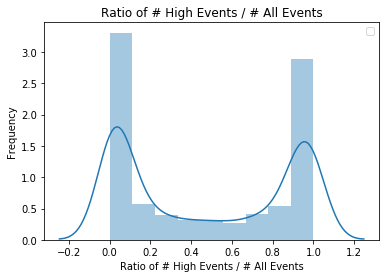

In [7]:
## How correct are the strains

#g=sns.distplot(accuracy_df.mean_correct_low_classifier, label="low")
g=sns.distplot(accuracy_df.mean_correct_high_classifier)
g.set_xlabel("Ratio of # High Events / # All Events")
g.set_ylabel("Frequency")
g.set_title("Ratio of # High Events / # All Events")
g.legend()

In [80]:
plot_df.strain_name.unique()


array(['Fluorescent_beads', 'Sizing_beads', 'CRISPR_CEN.PK2_24926',
       'CRISPR_CEN.PK2_negative_control_23970', 'CRISPR_CEN.PK2_24961',
       'CRISPR_CEN.PK2_24959', 'CRISPR_w303_positive_control_NOR_00_6390',
       'CRISPR_CEN.PK2_24952', 'CRISPR_CEN.PK2_inducible_FP_25784',
       'CRISPR_CEN.PK2_24962', 'CRISPR_CEN.PK2_24963',
       'CRISPR_CEN.PK2_positive_control_yeVenus_32302',
       'CRISPR_CEN.PK2_24960',
       'CRISPR_CEN.PK2_positive_control_NOR_00_24864'], dtype=object)

In [8]:
def plot_correctness_grid(experiment_id, accuracy_df, correctness_col):
## How does correctness change over time
    plot_df = accuracy_df.loc[accuracy_df.experiment_id ==  experiment_id]
    strains_to_remove = [
        'Fluorescent_beads',
        'Sizing_beads',
        'Media_control',
        'CRISPR_CEN.PK2_positive_control_yeVenus_32302',
        'CRISPR_CEN.PK2_positive_control_NOR_00_24864',
        'CRISPR_w303_positive_control_NOR_00_6390',
        'CRISPR_CEN.PK2_negative_control_23970'
    ]
    plot_df = plot_df.loc[~plot_df.strain_name.isin(strains_to_remove)]
    sns.set(rc={"lines.linewidth": 10})

    g = sns.FacetGrid(plot_df, col="inducer_concentration", row='strain_name', hue="replicate", height=4, margin_titles=True)
    g.map(sns.lineplot, 'timepoint', correctness_col)
    [plt.setp(ax.texts, text="") for ax in g.axes.flat] # remove the original texts
                                                # important to add this before setting titles
    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')       



dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308


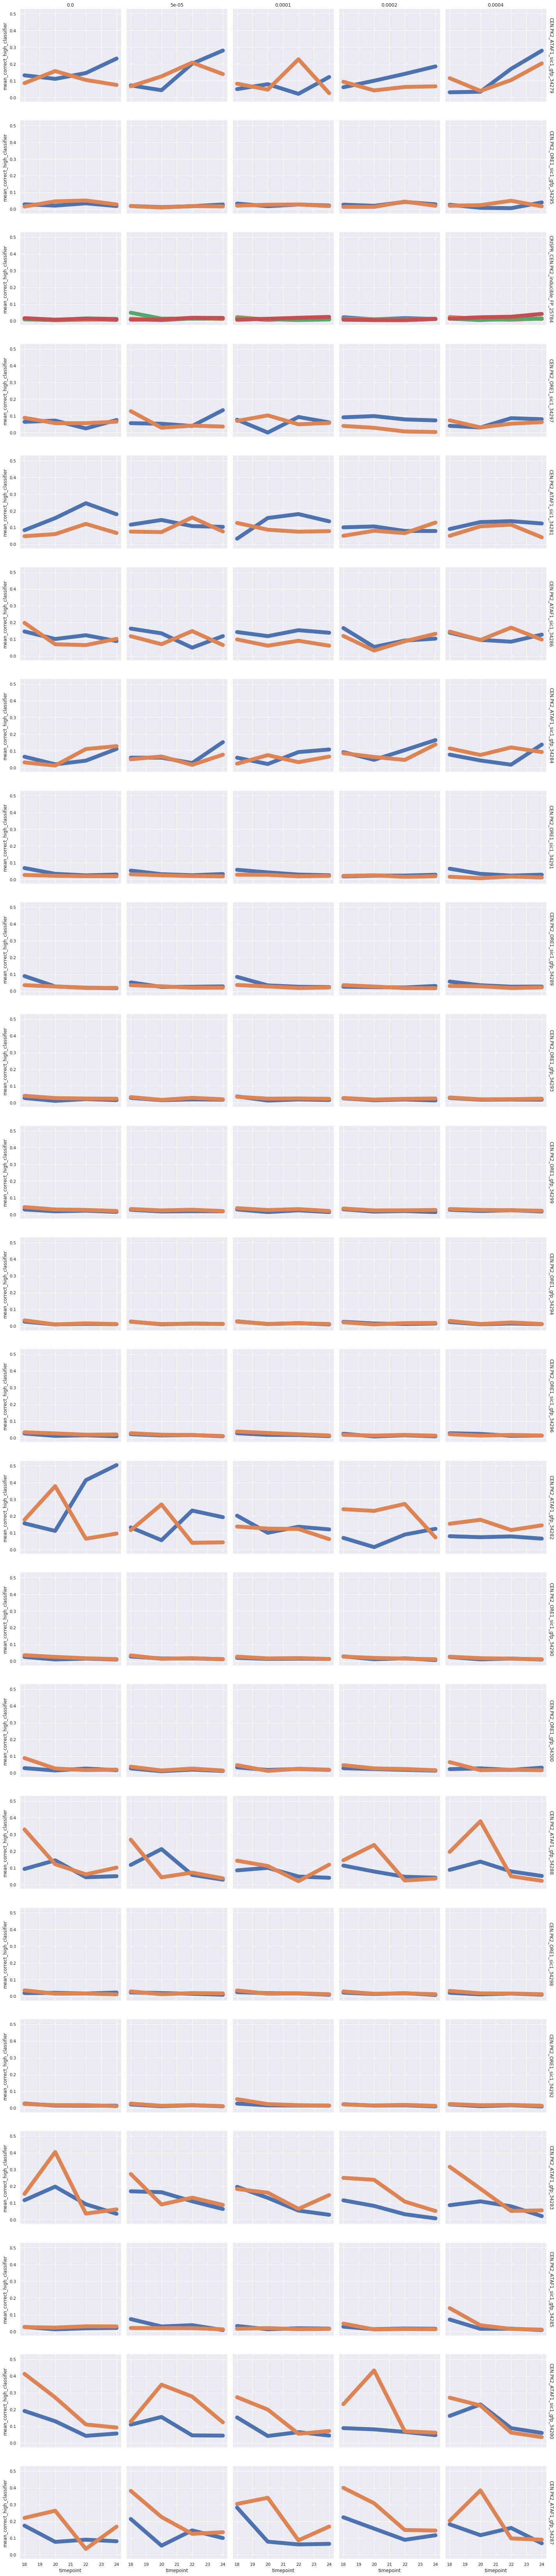

dc_YeastSTATES-CRISPR-Dose-Response_20200423194728


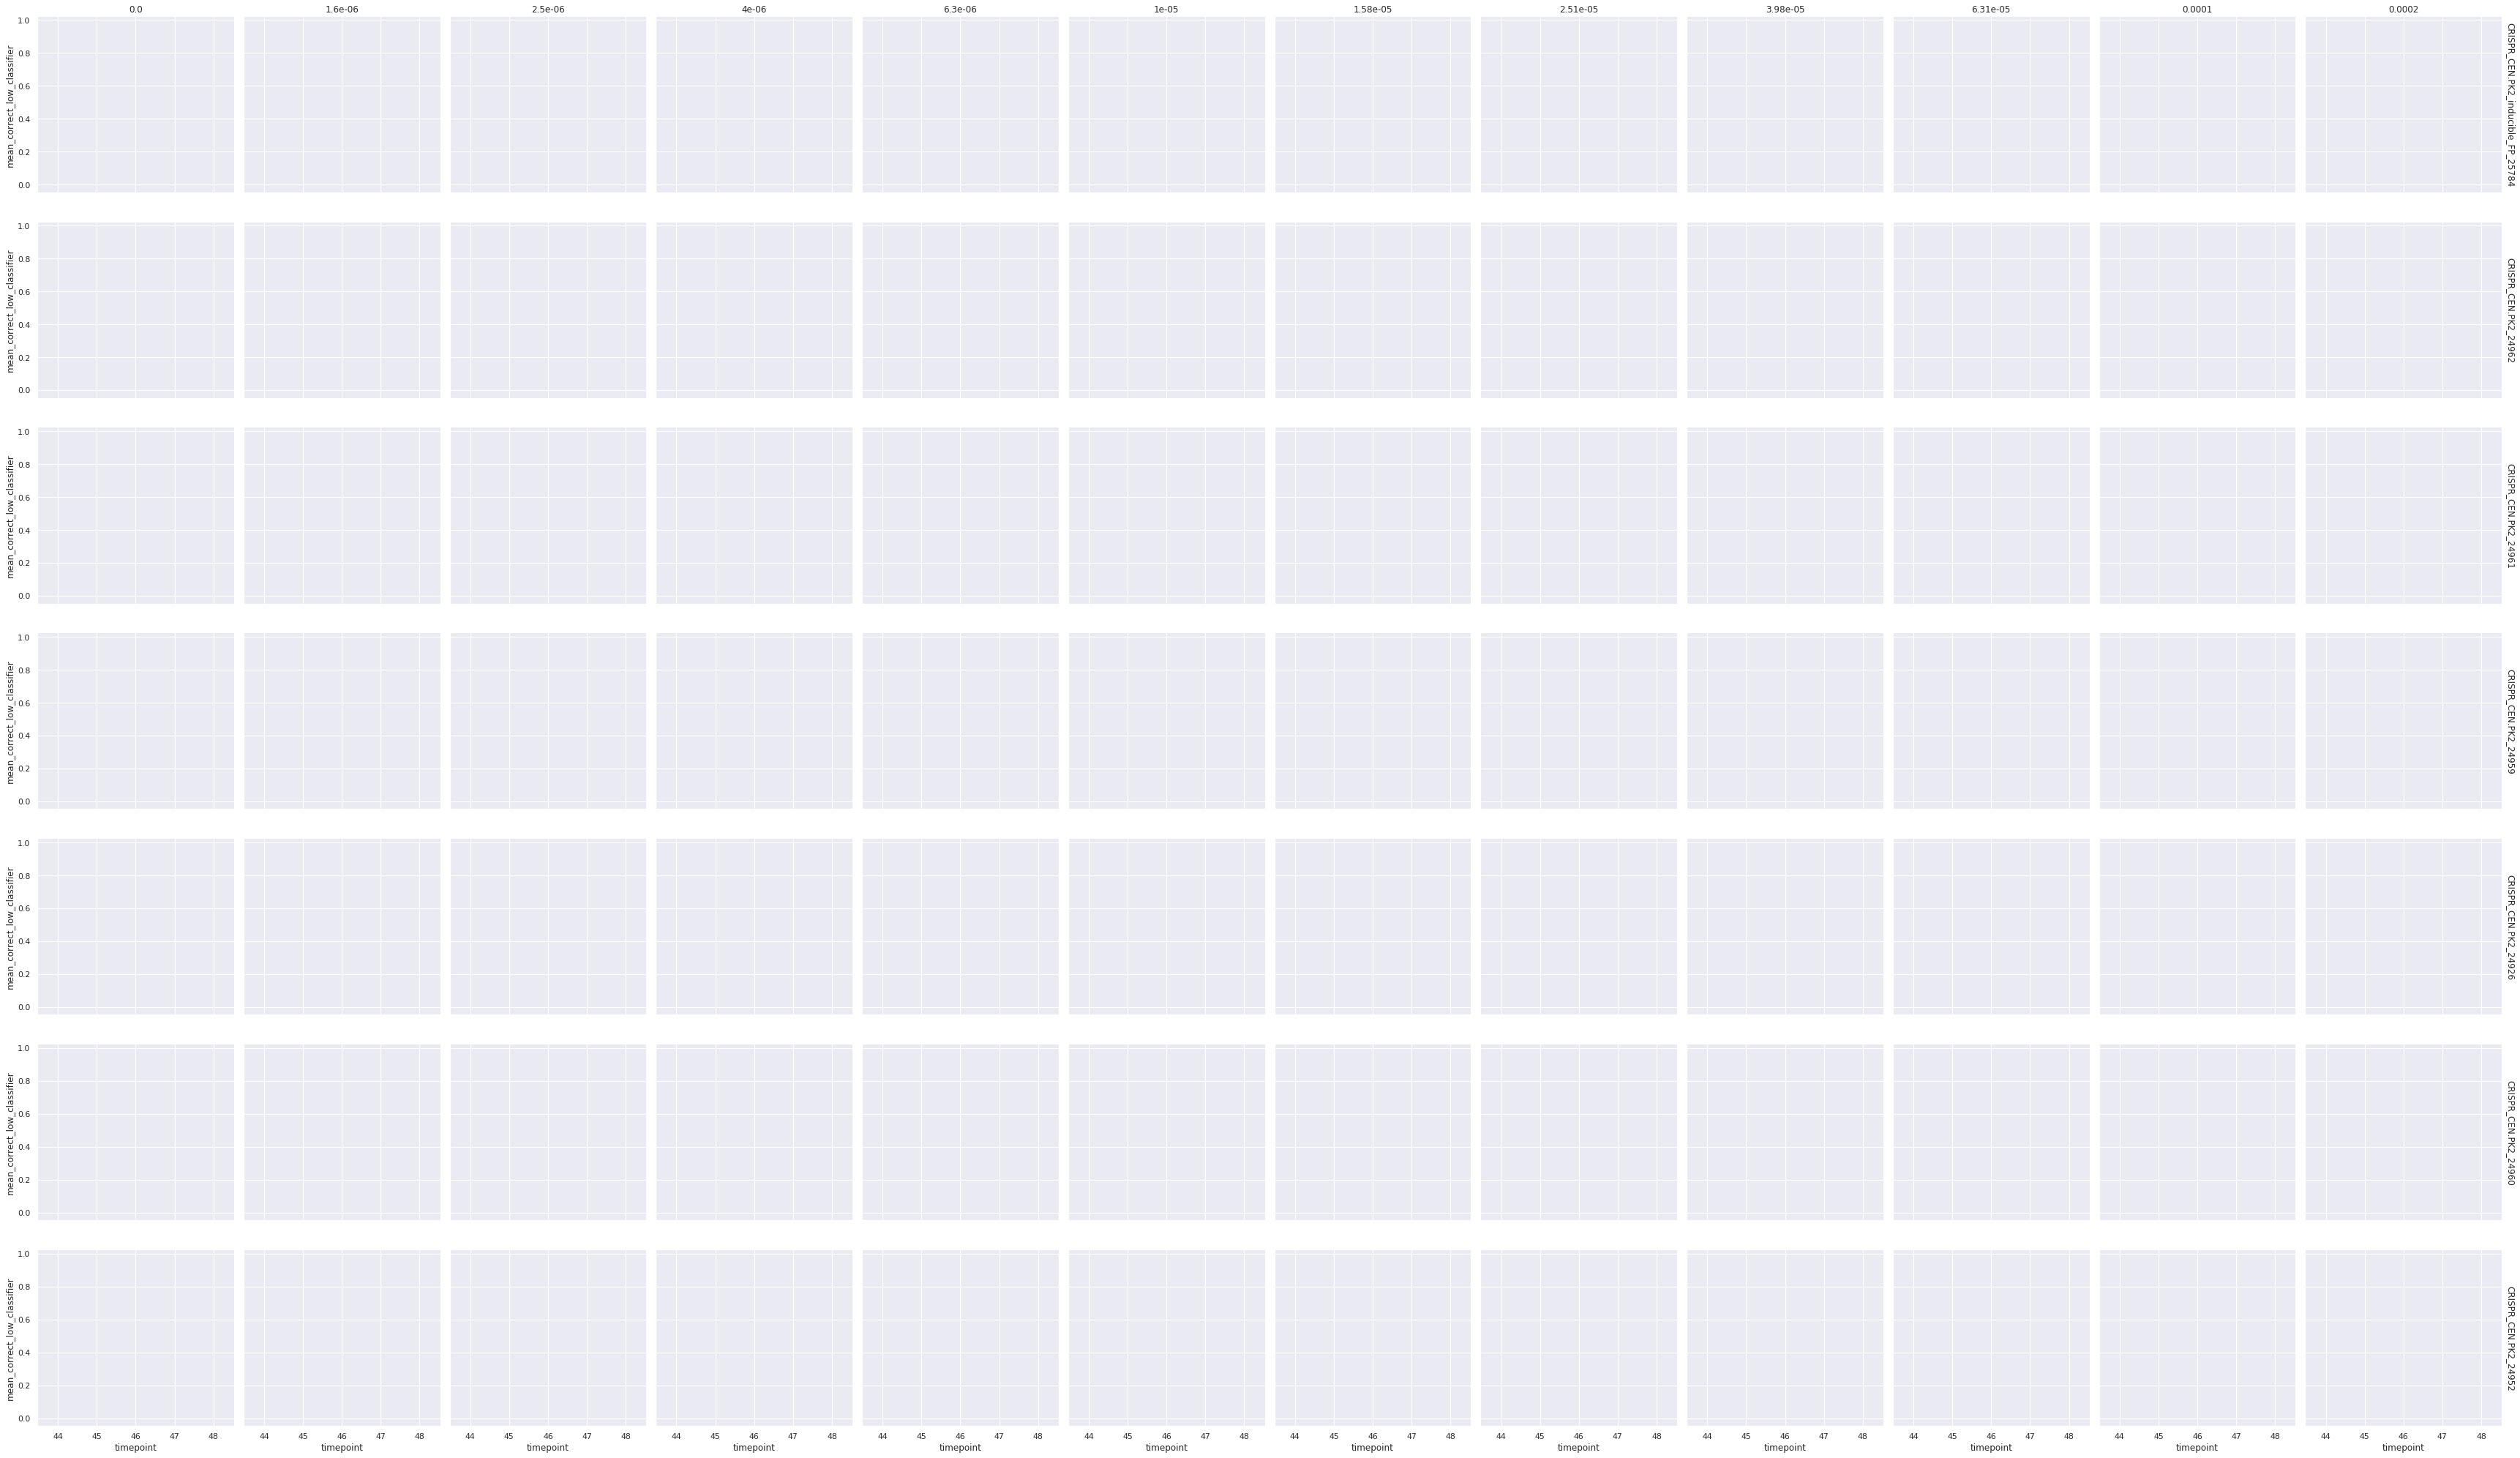

dc_YeastSTATES-CRISPR-Long-Duration-Time-Series-20191208_20200423193808


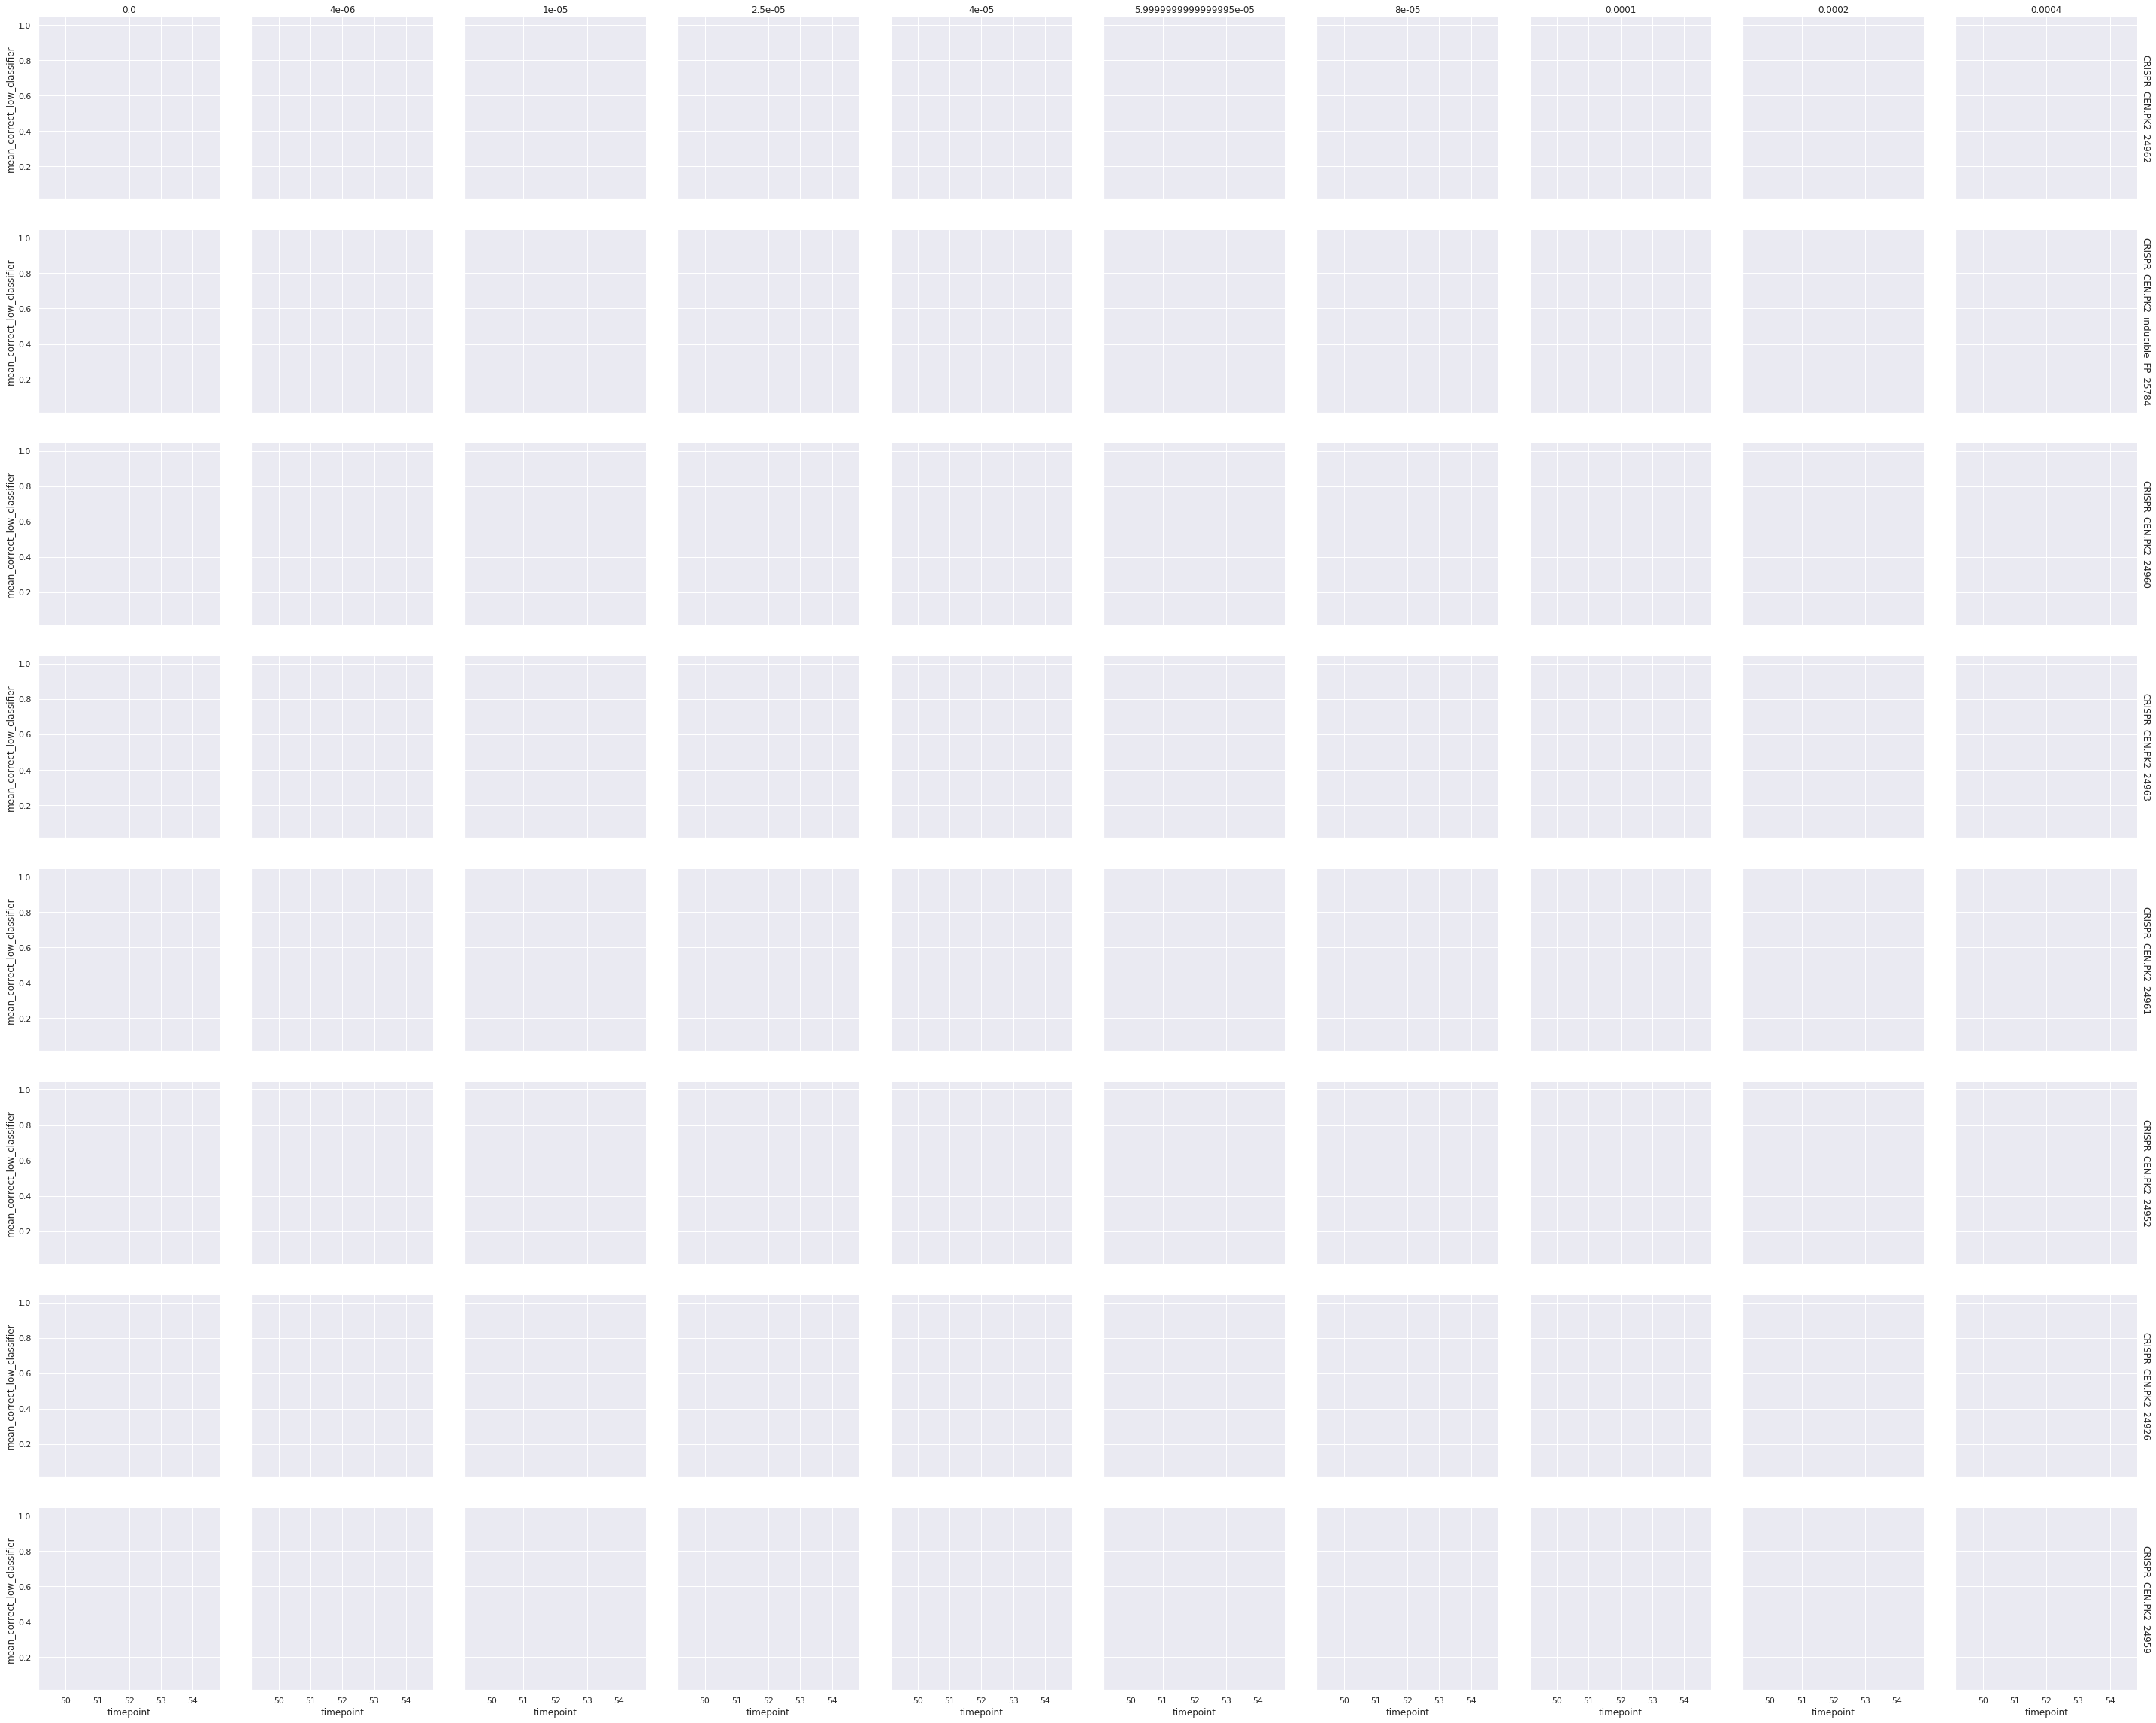

dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-35C_20200423195648


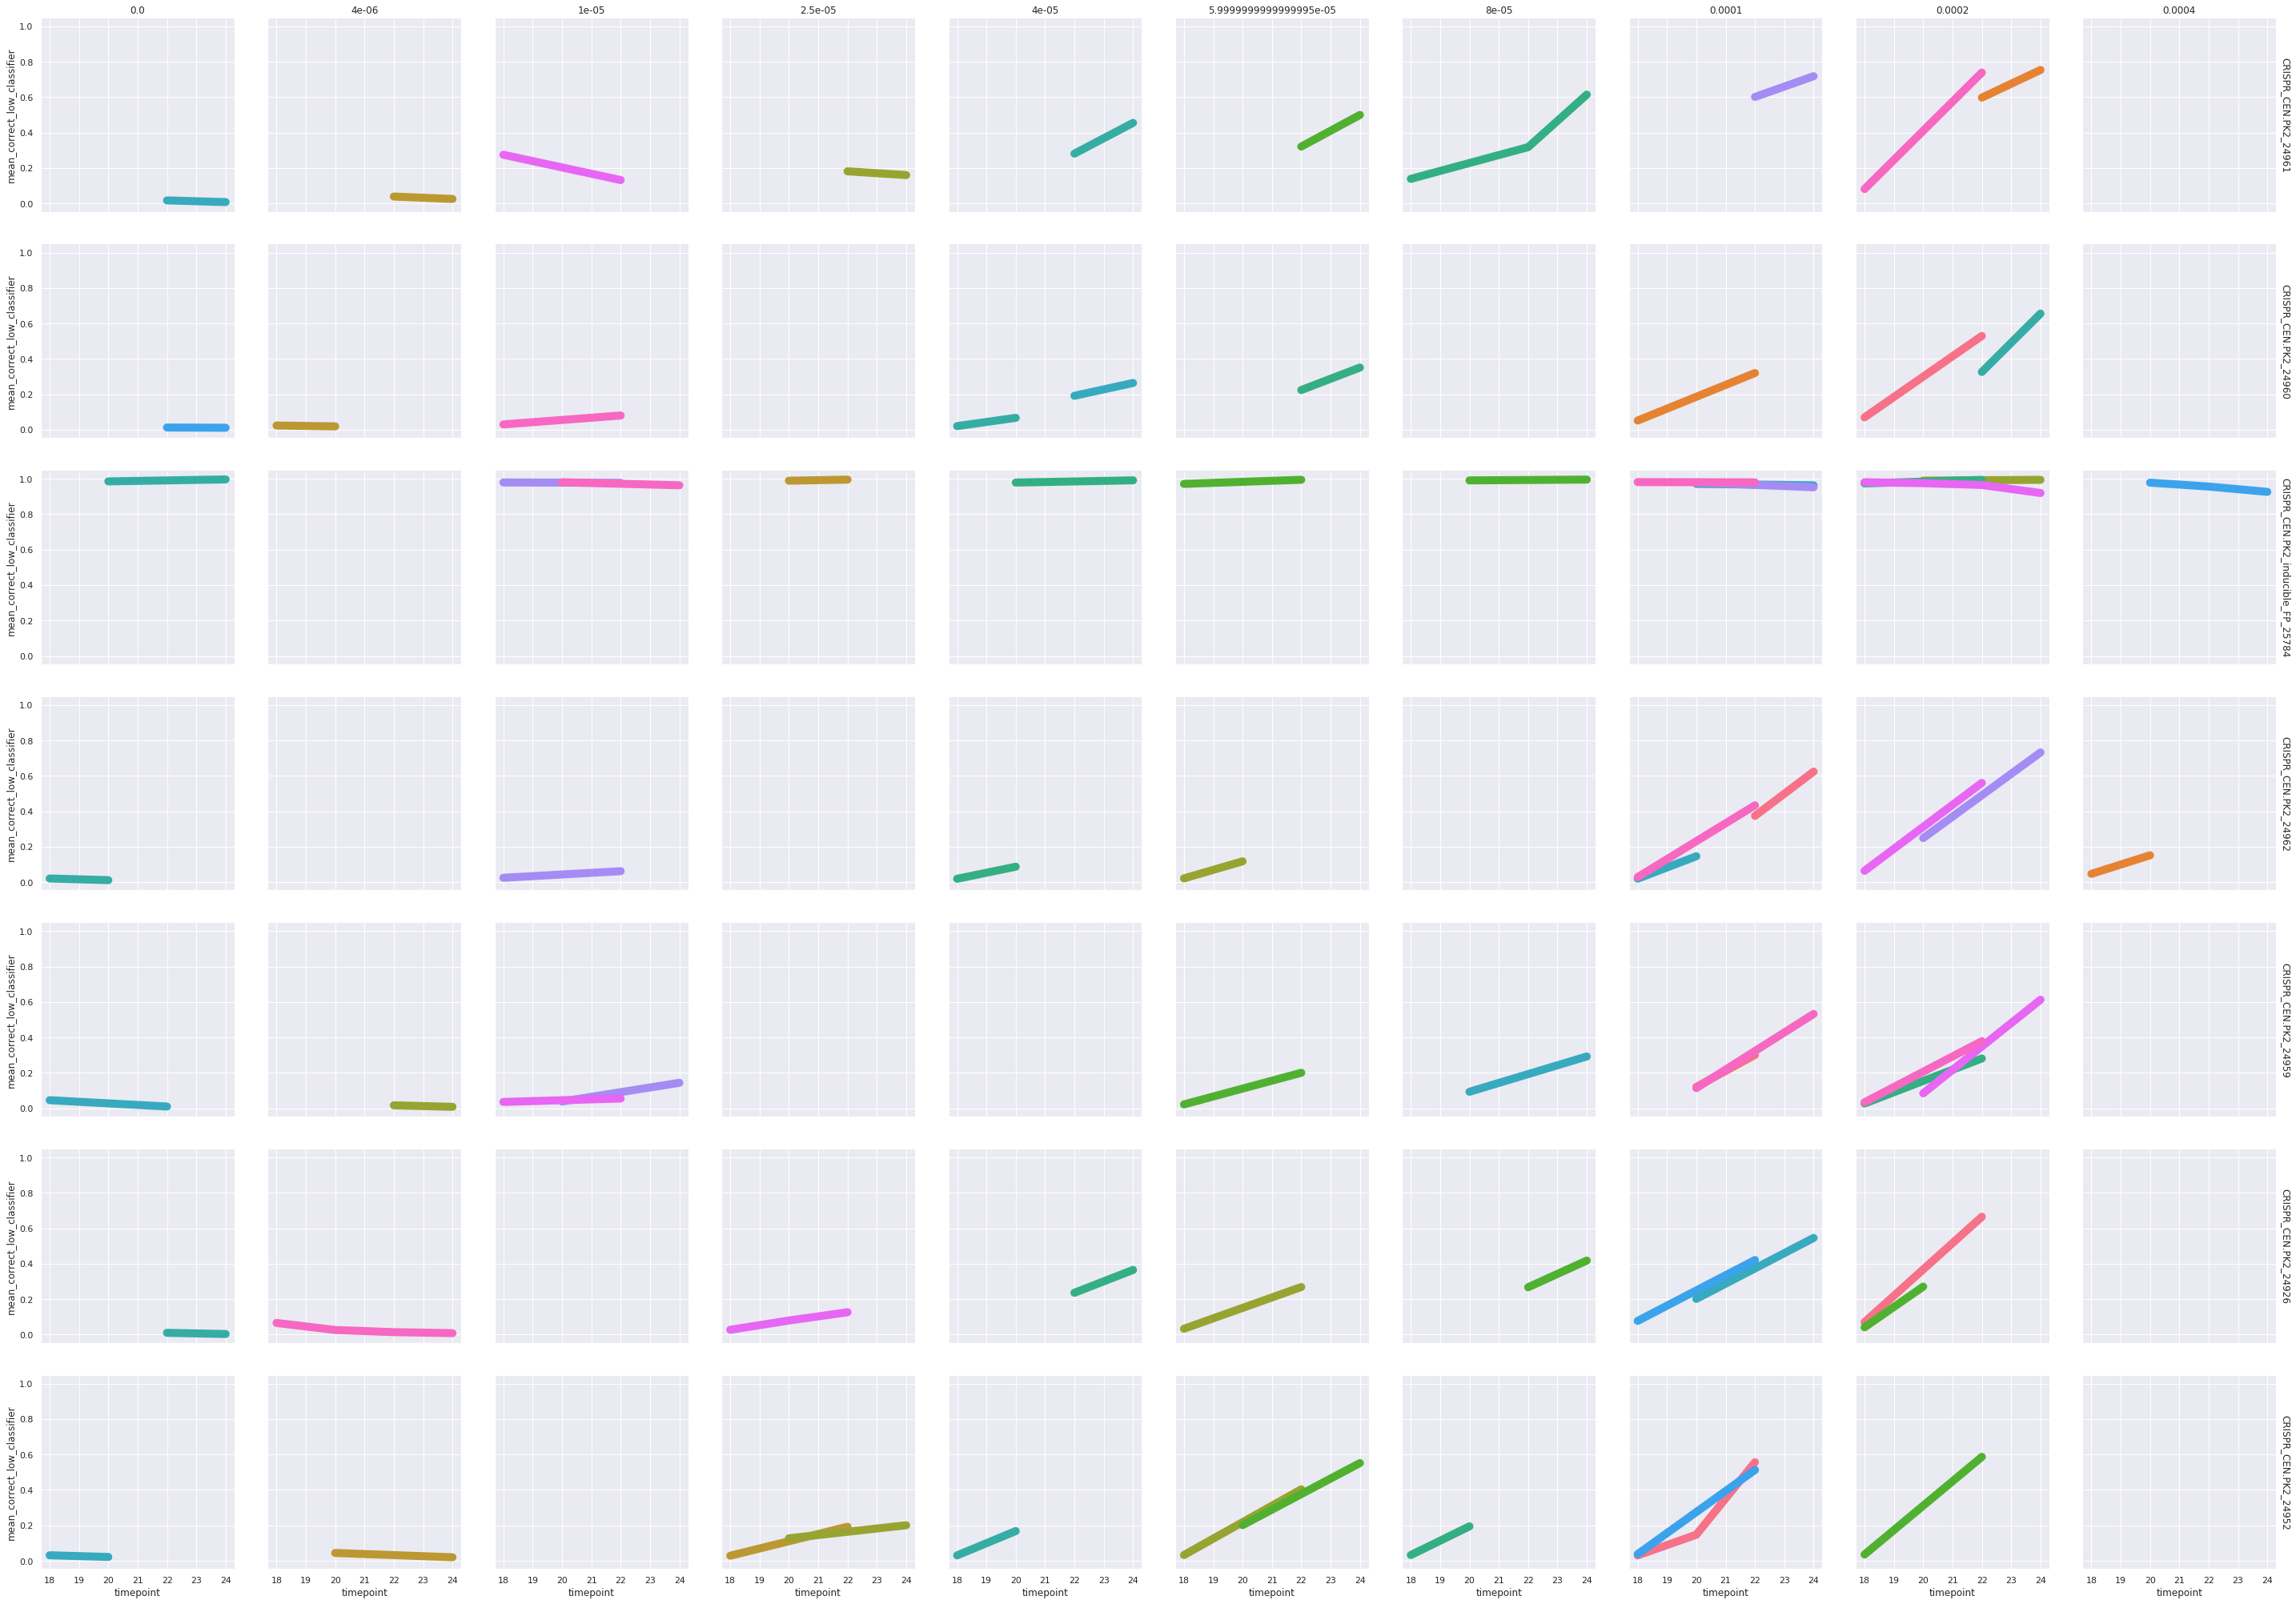

dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-20191208_20200423194115


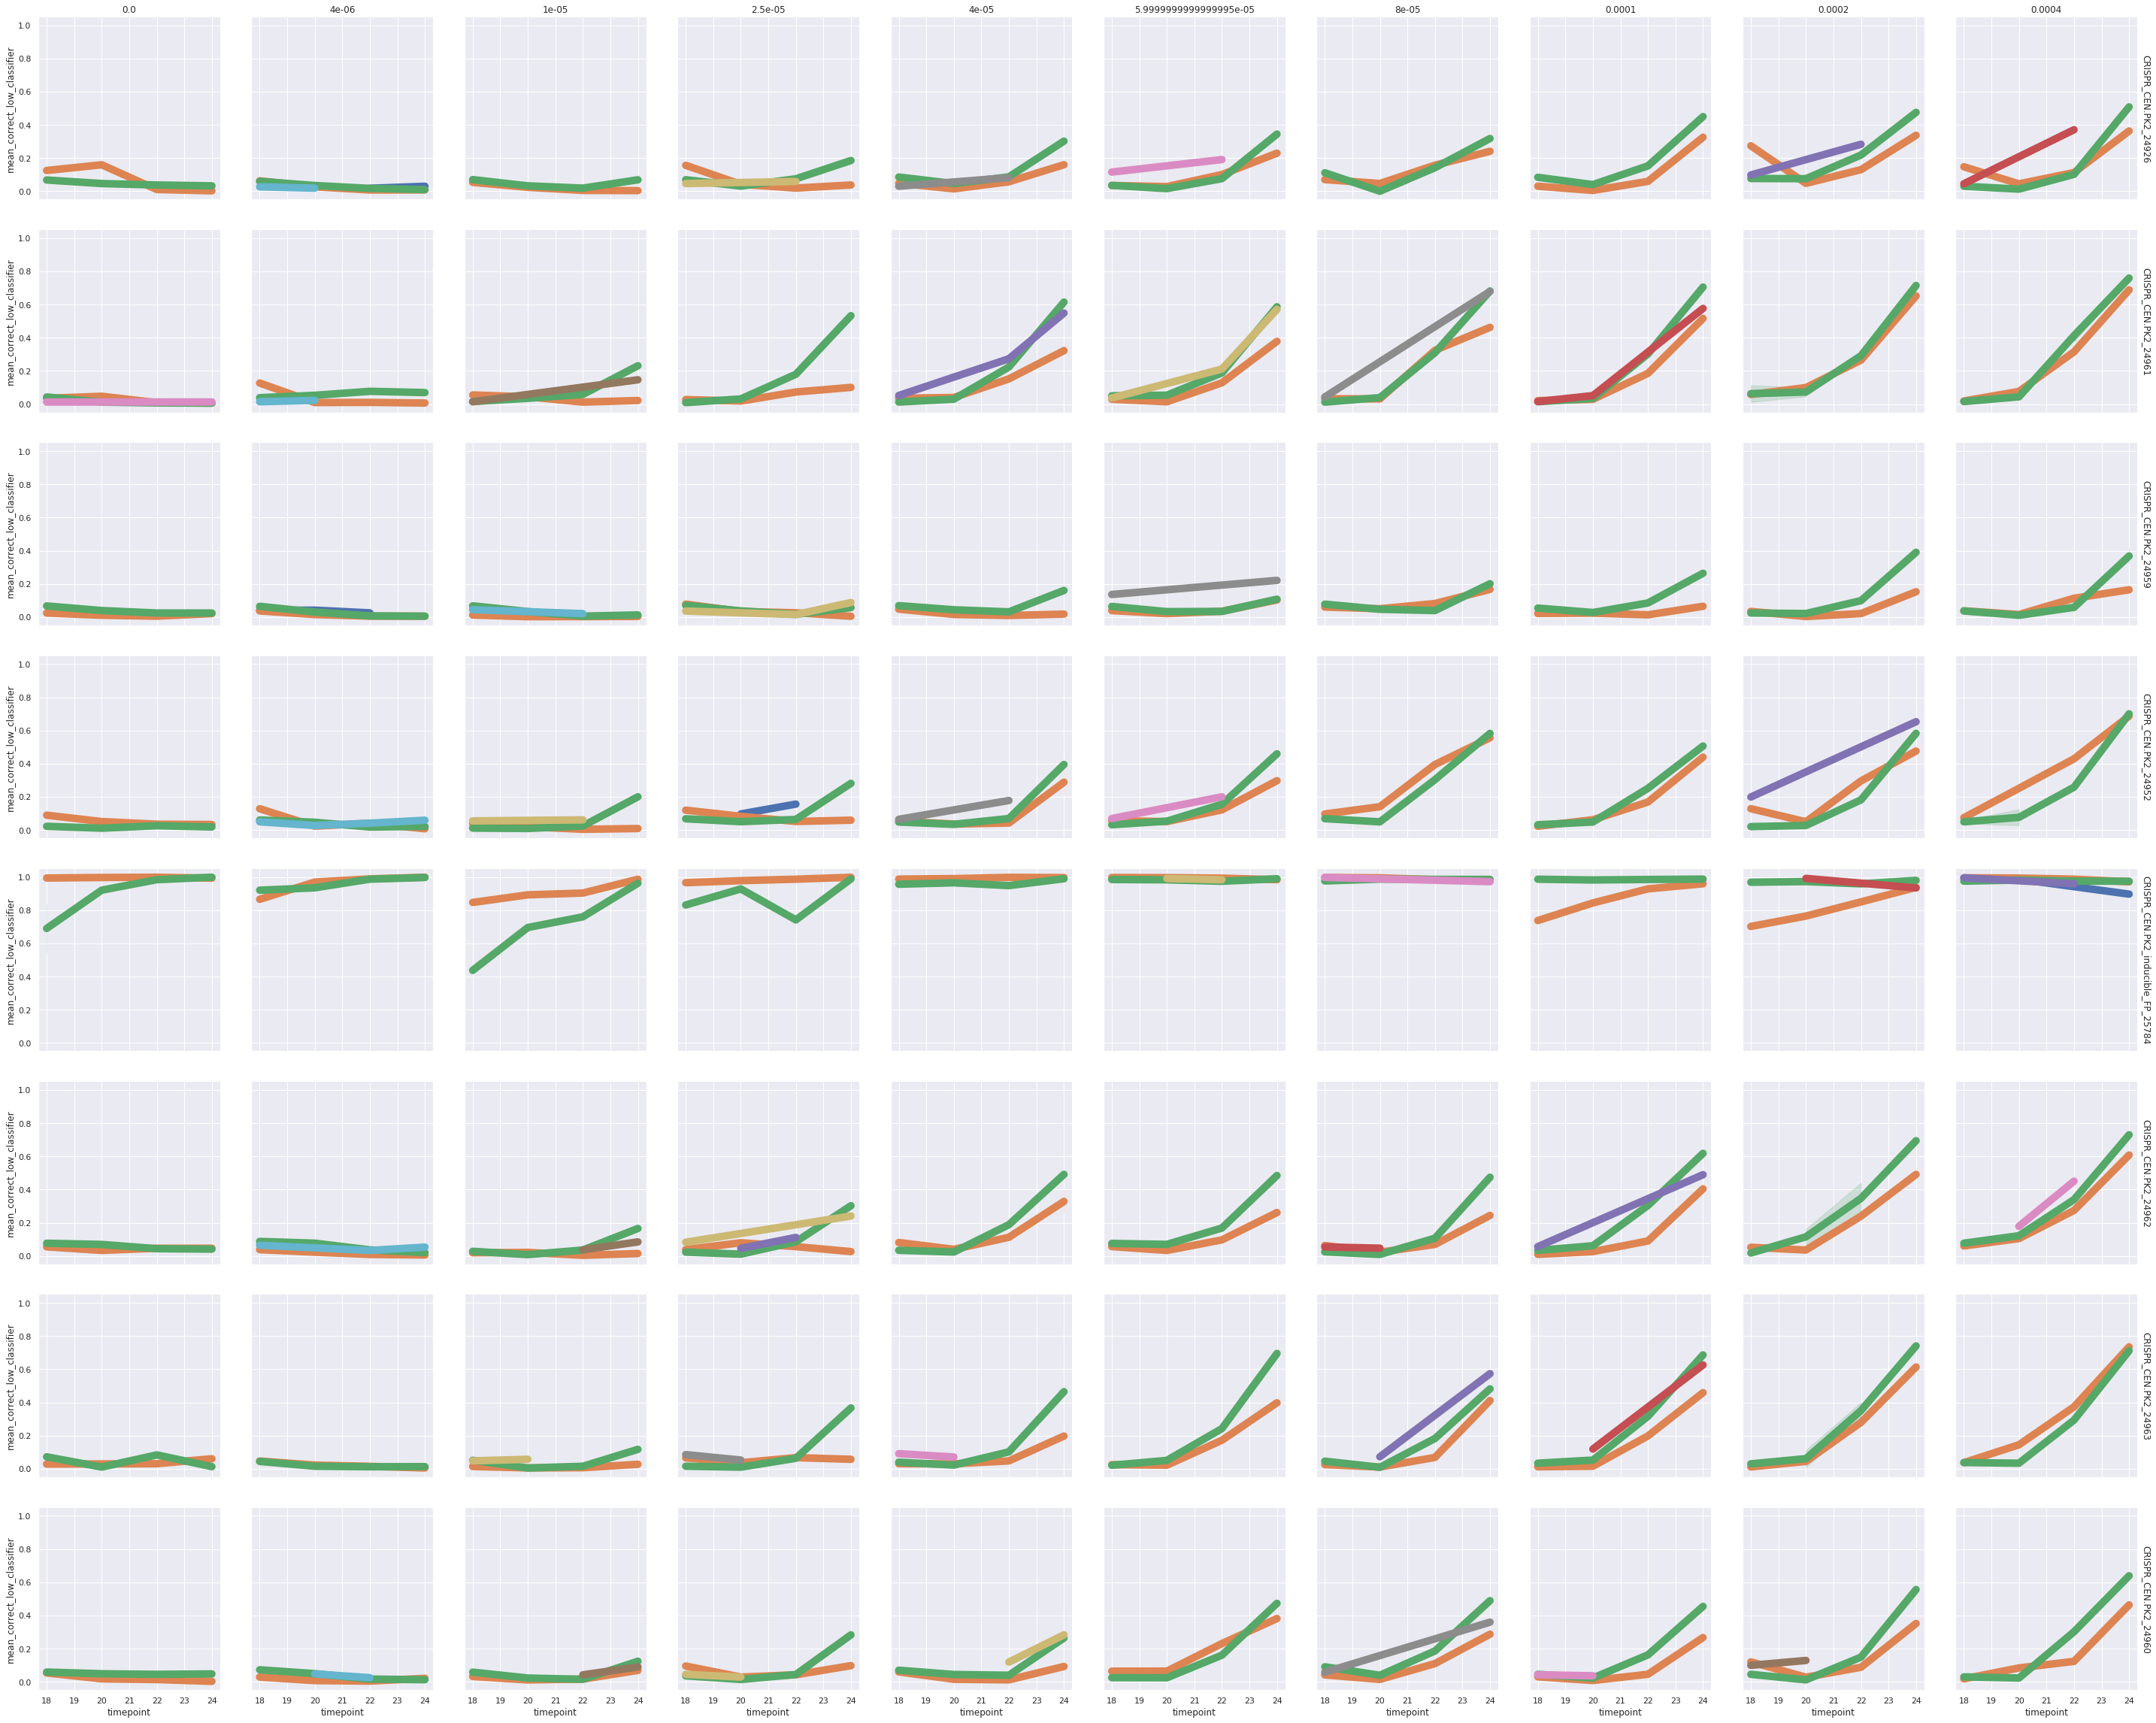

dc_YeastSTATES-Doxycycline-OR-Gate-Plant-TF-Dose-Response_20200426192144


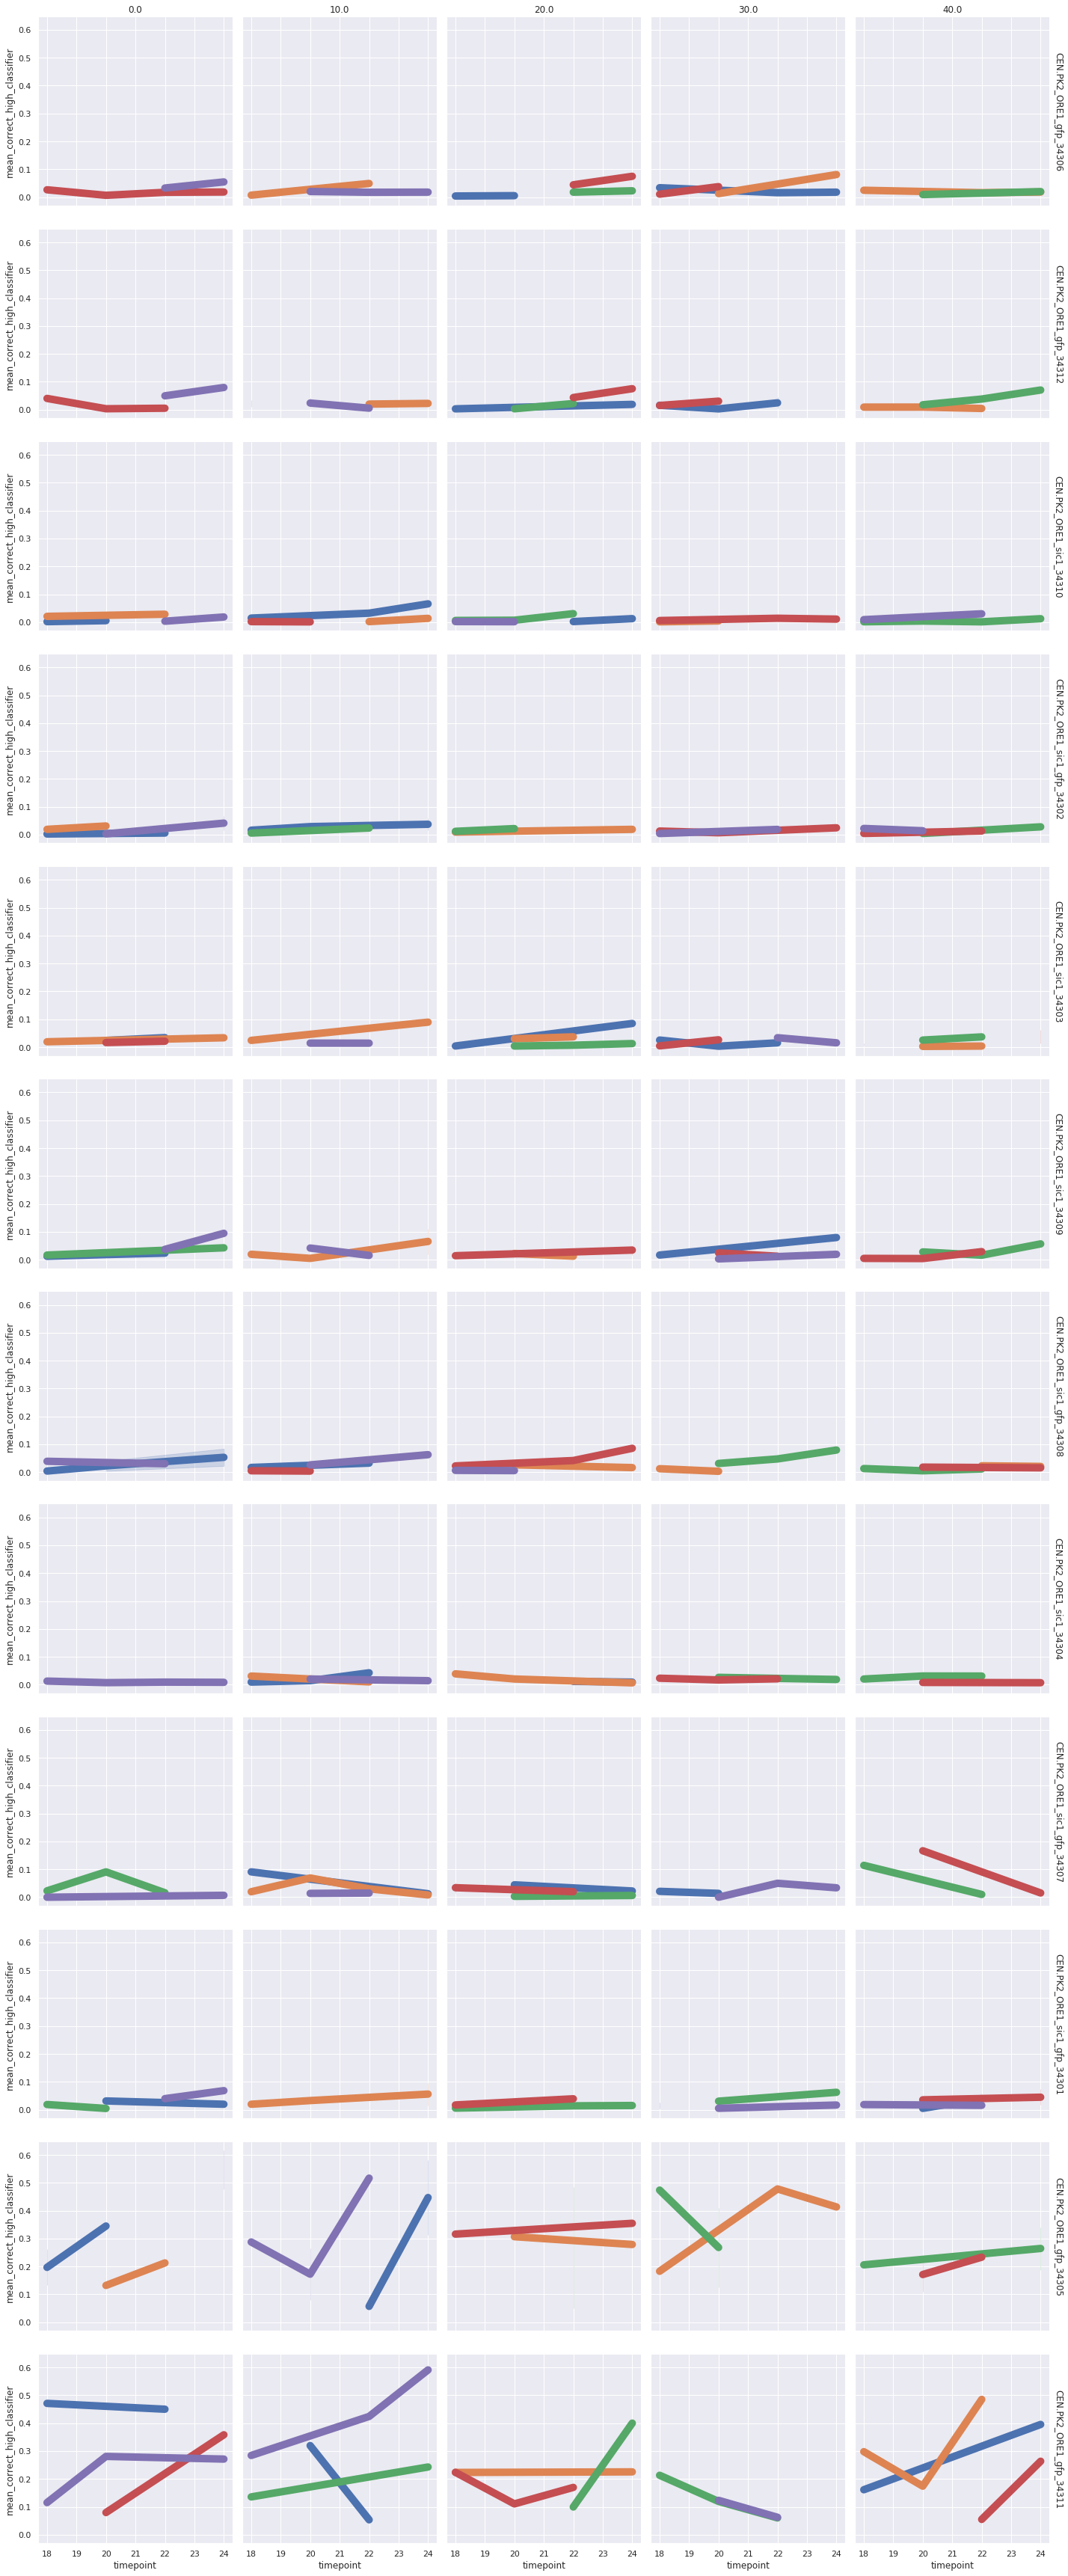

dc_YeastSTATES-OR-Gate-CRISPR-Dose-Response_20200423202039


IndexError: index 0 is out of bounds for axis 1 with size 0

<Figure size 0x1152 with 0 Axes>

In [105]:
experiment_ref_correctness = {
    "dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-20191208_20200423194115" : "mean_correct_low_classifier",
    "dc_YeastSTATES-Doxycycline-OR-Gate-Plant-TF-Dose-Response_20200426192144" :'mean_correct_high_classifier',
    "dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308" : 'mean_correct_high_classifier',
    'dc_YeastSTATES-CRISPR-Dose-Response_20200423194728' : "mean_correct_low_classifier",
    'dc_YeastSTATES-CRISPR-Long-Duration-Time-Series-20191208_20200423193808' : "mean_correct_low_classifier",   
    'dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-35C_20200423195648' : "mean_correct_low_classifier" ,
    'dc_YeastSTATES-OR-Gate-CRISPR-Dose-Response_20200423202039' : 'mean_correct_high_classifier'
}

for experiment in approved_experiments:
    experiment_ref = experiment.split("/")[-1]
    print(experiment_ref)
    
    if experiment_ref in experiment_ref_correctness:
        correctness_col = experiment_ref_correctness[experiment_ref]
    else:
        correctness_col = "correctness"
    plot_correctness_grid(experiment_ref,
                          accuracy_df,
                          correctness_col)
    plt.show()




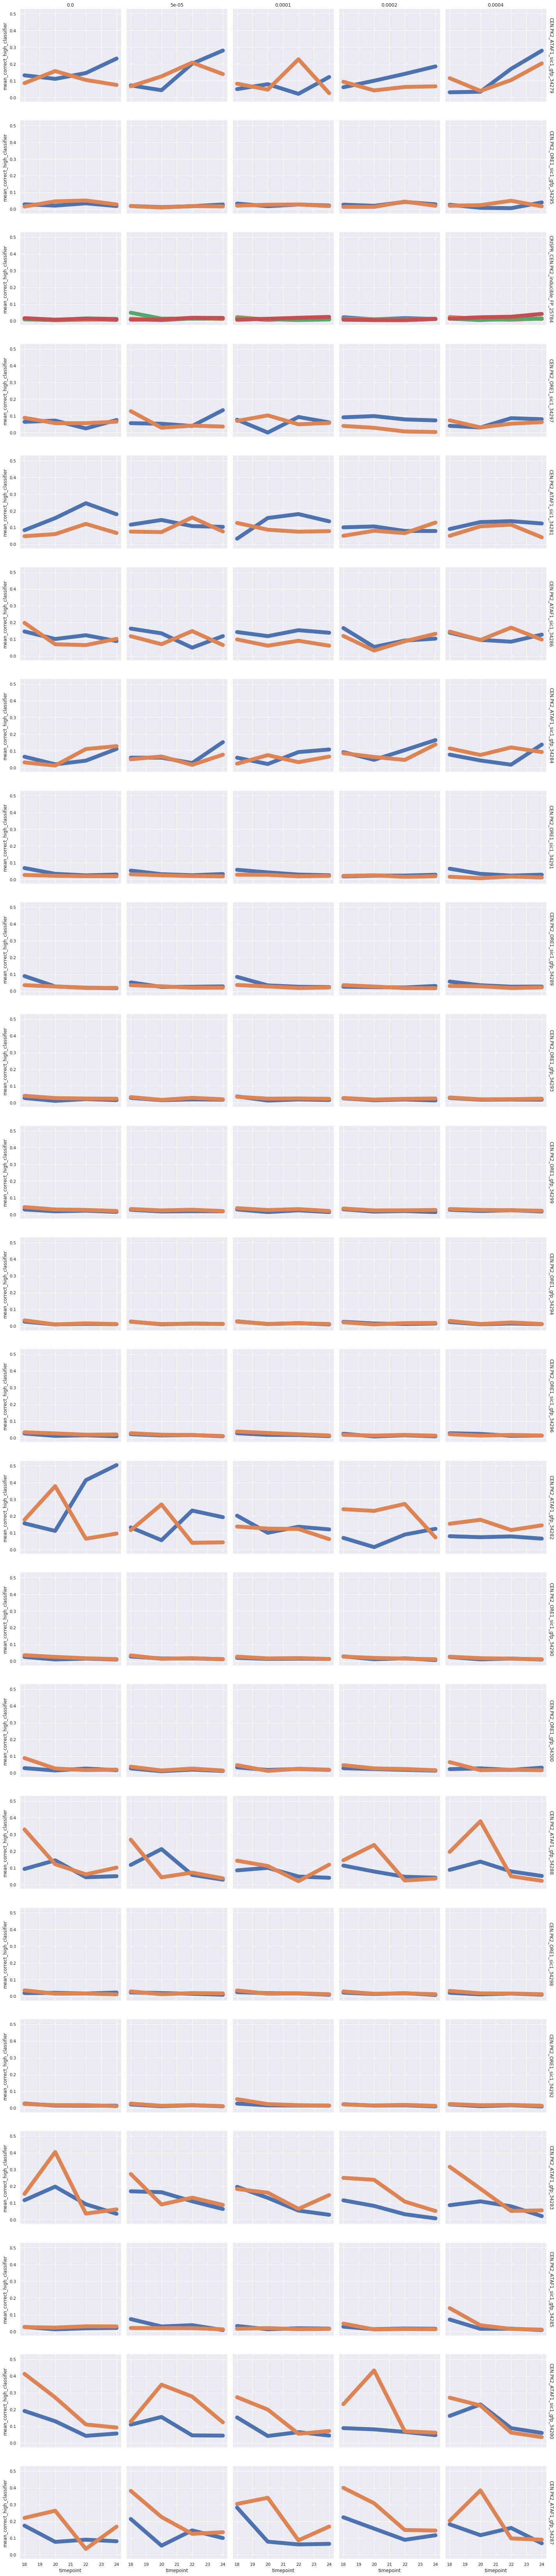

In [89]:
## How does correctness change over time
plot_df = accuracy_df.loc[accuracy_df.experiment_id == "dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308" ]
strains_to_remove = [
    'Fluorescent_beads',
    'Sizing_beads',
    'Media_control',
    'CRISPR_CEN.PK2_positive_control_yeVenus_32302',
    'CRISPR_CEN.PK2_positive_control_NOR_00_24864',
    'CRISPR_w303_positive_control_NOR_00_6390',
    'CRISPR_CEN.PK2_negative_control_23970'
]
plot_df = plot_df.loc[~plot_df.strain_name.isin(strains_to_remove)]
sns.set(rc={"lines.linewidth": 10})

g = sns.FacetGrid(plot_df, col="inducer_concentration", row='strain_name', hue="replicate", height=4, margin_titles=True)
#g.map(sns.lineplot, 'timepoint', 'correctness')
g.map(sns.lineplot, 'timepoint', 'mean_correct_high_classifier')
[plt.setp(ax.texts, text="") for ax in g.axes.flat] # remove the original texts
                                            # important to add this before setting titles
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')       



In [5]:
all_df = pd.DataFrame()
for experiment_path in approved_experiments:
    experiment_name = experiment_path.split("/")[-1]
    print(experiment_name)
    #print(experiment_path)
    data_file = experiment_name + ".csv"
    data_files = [x['name'] for x in ag.files.list(filePath="10x", systemId=DATA_CONVERGE_CORRECTNESS_DATA_PROJECT_ID)]
    if data_file in data_files:
        data_file_path = os.path.join(data_converge_correctness_data_base, '10x', data_file)
        df = pd.read_csv(data_file_path, index_col=0)
        df.loc[:,'experiment_id'] = experiment_name
        all_df = all_df.append(df, ignore_index=True)
all_df


dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
dc_YeastSTATES-CRISPR-Dose-Response_20200423194728
dc_YeastSTATES-CRISPR-Long-Duration-Time-Series-20191208_20200423193808
dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-35C_20200423195648
dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-20191208_20200423194115
dc_YeastSTATES-Doxycycline-OR-Gate-Plant-TF-Growth-Curves_20200423201744
dc_YeastSTATES-OR-Gate-CRISPR-Dose-Response_20200423202039


,diff_all,inducer_concentration,replicate,strain_name,timepoint,diff_pred,experiment_id
0,0.898099,0.00000,1,CEN.PK2_ATAF1_gfp_34282,NaN,1.862206,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
1,0.648180,0.00005,1,CEN.PK2_ATAF1_gfp_34282,NaN,0.172947,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
2,0.327191,0.00010,1,CEN.PK2_ATAF1_gfp_34282,NaN,0.238920,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
3,0.219853,0.00020,1,CEN.PK2_ATAF1_gfp_34282,NaN,0.124951,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
4,0.109559,0.00040,1,CEN.PK2_ATAF1_gfp_34282,NaN,0.125332,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
5,0.479916,NaN,1,CEN.PK2_ATAF1_gfp_34282,18.0,0.158126,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
6,0.307192,NaN,1,CEN.PK2_ATAF1_gfp_34282,20.0,0.121584,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
7,1.049824,NaN,1,CEN.PK2_ATAF1_gfp_34282,22.0,1.888970,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
8,1.061702,NaN,1,CEN.PK2_ATAF1_gfp_34282,24.0,1.808687,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
9,0.723665,0.00000,2,CEN.PK2_ATAF1_gfp_34282,NaN,1.238588,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308


In [8]:
strains_to_remove = [
    'Fluorescent_beads',
    'Sizing_beads',
    'Media_control'
]
all_df = all_df.loc[~all_df.strain_name.isin(strains_to_remove)]
all_df

,diff_all,inducer_concentration,replicate,strain_name,timepoint,diff_pred,experiment_id
0,0.898099,0.00000,1,CEN.PK2_ATAF1_gfp_34282,NaN,1.862206,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
1,0.648180,0.00005,1,CEN.PK2_ATAF1_gfp_34282,NaN,0.172947,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
2,0.327191,0.00010,1,CEN.PK2_ATAF1_gfp_34282,NaN,0.238920,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
3,0.219853,0.00020,1,CEN.PK2_ATAF1_gfp_34282,NaN,0.124951,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
4,0.109559,0.00040,1,CEN.PK2_ATAF1_gfp_34282,NaN,0.125332,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
5,0.479916,NaN,1,CEN.PK2_ATAF1_gfp_34282,18.0,0.158126,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
6,0.307192,NaN,1,CEN.PK2_ATAF1_gfp_34282,20.0,0.121584,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
7,1.049824,NaN,1,CEN.PK2_ATAF1_gfp_34282,22.0,1.888970,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
8,1.061702,NaN,1,CEN.PK2_ATAF1_gfp_34282,24.0,1.808687,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
9,0.723665,0.00000,2,CEN.PK2_ATAF1_gfp_34282,NaN,1.238588,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308


In [9]:
all_df.strain_name.unique()

array(['CEN.PK2_ATAF1_gfp_34282', 'CEN.PK2_ATAF1_gfp_34283',
       'CEN.PK2_ATAF1_gfp_34287', 'CEN.PK2_ATAF1_gfp_34288',
       'CEN.PK2_ATAF1_sic1_34281', 'CEN.PK2_ATAF1_sic1_34286',
       'CEN.PK2_ATAF1_sic1_gfp_34279', 'CEN.PK2_ATAF1_sic1_gfp_34280',
       'CEN.PK2_ATAF1_sic1_gfp_34284', 'CEN.PK2_ATAF1_sic1_gfp_34285',
       'CEN.PK2_ORE1_gfp_34293', 'CEN.PK2_ORE1_gfp_34294',
       'CEN.PK2_ORE1_gfp_34299', 'CEN.PK2_ORE1_gfp_34300',
       'CEN.PK2_ORE1_sic1_34291', 'CEN.PK2_ORE1_sic1_34292',
       'CEN.PK2_ORE1_sic1_34297', 'CEN.PK2_ORE1_sic1_34298',
       'CEN.PK2_ORE1_sic1_gfp_34289', 'CEN.PK2_ORE1_sic1_gfp_34290',
       'CEN.PK2_ORE1_sic1_gfp_34295', 'CEN.PK2_ORE1_sic1_gfp_34296',
       'CRISPR_CEN.PK2_inducible_FP_25784',
       'CRISPR_CEN.PK2_negative_control_23970',
       'CRISPR_CEN.PK2_positive_control_NOR_00_24864',
       'CRISPR_w303_positive_control_NOR_00_6390', 'CRISPR_CEN.PK2_24926',
       'CRISPR_CEN.PK2_24952', 'CRISPR_CEN.PK2_24959',
       'CRISPR_CEN

In [10]:
## Take Data from all experiments and get the best cases
all_df.sort_values(by=['diff_all'], ascending=False)
all_df = all_df.fillna(-1)
all_df

,diff_all,inducer_concentration,replicate,strain_name,timepoint,diff_pred,experiment_id
0,0.898099,0.00000,1,CEN.PK2_ATAF1_gfp_34282,-1.0,1.862206,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
1,0.648180,0.00005,1,CEN.PK2_ATAF1_gfp_34282,-1.0,0.172947,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
2,0.327191,0.00010,1,CEN.PK2_ATAF1_gfp_34282,-1.0,0.238920,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
3,0.219853,0.00020,1,CEN.PK2_ATAF1_gfp_34282,-1.0,0.124951,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
4,0.109559,0.00040,1,CEN.PK2_ATAF1_gfp_34282,-1.0,0.125332,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
5,0.479916,-1.00000,1,CEN.PK2_ATAF1_gfp_34282,18.0,0.158126,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
6,0.307192,-1.00000,1,CEN.PK2_ATAF1_gfp_34282,20.0,0.121584,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
7,1.049824,-1.00000,1,CEN.PK2_ATAF1_gfp_34282,22.0,1.888970,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
8,1.061702,-1.00000,1,CEN.PK2_ATAF1_gfp_34282,24.0,1.808687,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308
9,0.723665,0.00000,2,CEN.PK2_ATAF1_gfp_34282,-1.0,1.238588,dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Dose-Response_20200423200308


In [11]:
mean_replicate_df = all_df.groupby(['strain_name', 'timepoint', 'inducer_concentration', 'experiment_id' ]).agg(np.mean).drop(columns=['replicate']).reset_index()

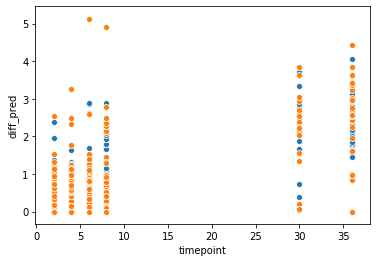

In [13]:
time_df = all_df.loc[all_df.inducer_concentration == -1]
g = sns.scatterplot(time_df.timepoint.apply(lambda x: x-16), time_df.diff_all.apply(lambda x : np.e*x))
g = sns.scatterplot(time_df.timepoint.apply(lambda x: x-16), time_df.diff_pred.apply(lambda x : np.e*x))

#g.set(xscale="log")
#sns.distplot(time_df.diff_pred)

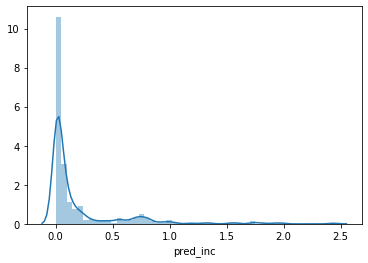

In [27]:
time_df.loc[:,'pred_inc'] = time_df.apply(lambda x: np.e*x.diff_pred/np.e*x.diff_all, axis=1)
sns.distplot(time_df.loc[time_df.pred_inc > 0].pred_inc)

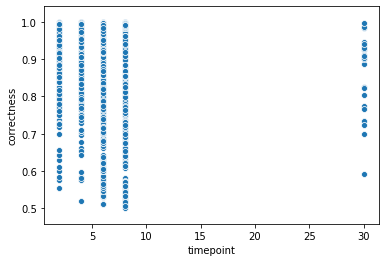

In [7]:
tp_agg = accuracy_df.groupby(['timepoint',  'replicate', 'strain_name', 'experiment_id']).agg(np.mean).reset_index()
sns.scatterplot(tp_agg.timepoint.apply(lambda x: x-16), tp_agg.correctness)

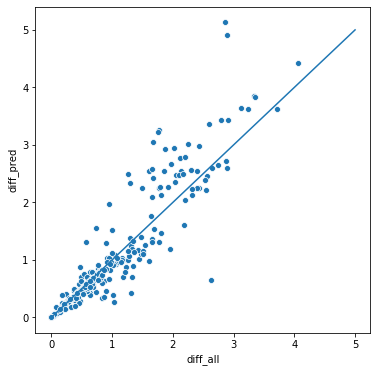

In [18]:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

sns.scatterplot(time_df.diff_all.apply(lambda x : np.e*x), time_df.diff_pred.apply(lambda x : np.e*x))
sns.lineplot([0,5], [0, 5])


[None]

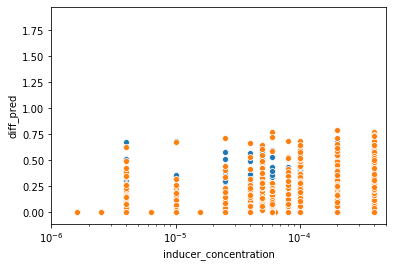

In [20]:
inducer_df = all_df.loc[all_df.timepoint == -1]
g = sns.scatterplot(inducer_df.inducer_concentration, inducer_df.diff_all.apply(lambda x : x))
g = sns.scatterplot(inducer_df.inducer_concentration, inducer_df.diff_pred.apply(lambda x : x))
g.set(xlim=(1e-6, 5e-4))
g.set(xscale="log")

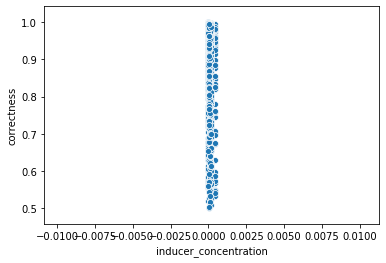

In [23]:
inducer_agg = accuracy_df.groupby(['timepoint', 'replicate', 'strain_name', 'experiment_id']).agg(np.mean).reset_index()
g = sns.scatterplot(inducer_agg.inducer_concentration, inducer_agg.correctness)
#g.set(xlim=(1e-6, 5e-4))
#g.set(xscale="log")

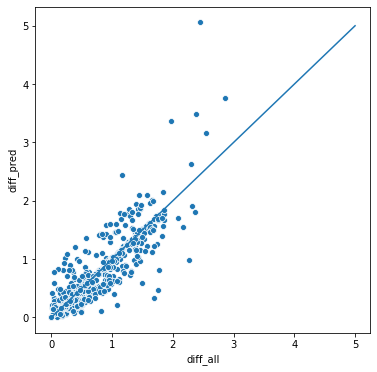

In [24]:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

sns.scatterplot(inducer_df.diff_all.apply(lambda x : np.e*x), inducer_df.diff_pred.apply(lambda x : np.e*x))
sns.lineplot([0,5], [0, 5])

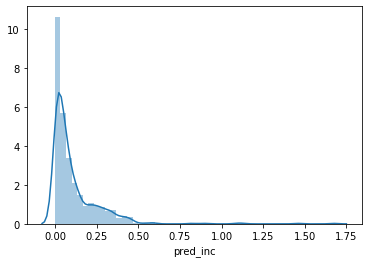

In [26]:
inducer_df.loc[:,'pred_inc'] = inducer_df.apply(lambda x: np.e*x.diff_pred/np.e*x.diff_all, axis=1)
sns.distplot(inducer_df.loc[inducer_df.pred_inc > 0].pred_inc)